In [8]:
import torch
import torch.nn as nn
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
# 卷积层
myconvlayer = nn.Conv2d( in_channels=3,
                         out_channels= 3,
                         kernel_size=2,
                         stride=1,
                         padding=0 )
# 池化层
mypoollayer = nn.MaxPool2d((2,2))
# 激活函数
myelu = nn.ELU()
# 拉直层
myflatten = nn.Flatten()
# Linear层
mylinear = nn.Linear(in_features=7203 , out_features= 1)


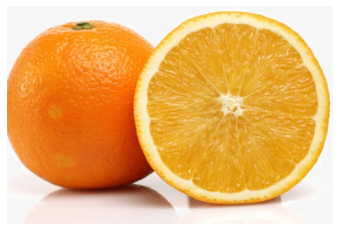

In [10]:
# 输入图片
path = '7.jpg'
input_image = Image.open(path)
# 可视化输入的图片
plt.imshow(input_image)
plt.axis('off')
plt.show()
# 把输入图片转化为Tensor
input_image = torchvision.transforms.ToTensor()(input_image)
input_image = torchvision.transforms.Resize((100,100))(input_image)

# 给 输入图片增加一个维度，这个维度表示其数量,1张
input_image = torch.unsqueeze(input_image,0)

In [15]:
random_input = torch.ones(1,3,10,10)
# 卷积层
output = myconvlayer(random_input)
print('卷积层输出:',output.size())
# 池化层
output = mypoollayer(output)
print('池化层输出:',output.size())
# 激活函数层
output = myelu(output)
print('激活函数层输出:',output.size())
# 拉直层
output = myflatten(output)
print('拉直层输出:',output.size())
# 全连接层
output = mylinear(output)
print('全连接层输出:',output.size())

卷积层输出: torch.Size([1, 3, 9, 9])
池化层输出: torch.Size([1, 3, 4, 4])
激活函数层输出: torch.Size([1, 3, 4, 4])
拉直层输出: torch.Size([1, 48])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x48 and 7203x1)

In [27]:
import numpy as np
def visualization_layer_output(input):
    input = input.detach().numpy()
    input = np.squeeze(input,0)
    input = np.transpose(input,(1,2,0))
    plt.imshow(input,cmap='gray')
    plt.show()

卷积层输出: torch.Size([1, 3, 99, 99])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


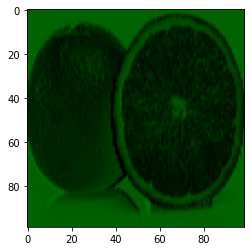

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


池化层输出: torch.Size([1, 3, 49, 49])


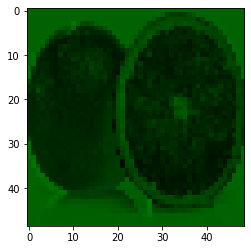

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


激活函数层输出: torch.Size([1, 3, 49, 49])


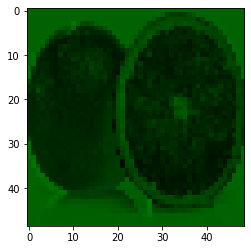

In [28]:
picture_input = input_image
# 卷积层
output = myconvlayer(picture_input)
print('卷积层输出:',output.size())
# 可视化层的输出
visualization_layer_output(output)
# 池化层
output = mypoollayer(output)
print('池化层输出:',output.size())
visualization_layer_output(output)
# 激活函数层
output = myelu(output)
print('激活函数层输出:',output.size())
visualization_layer_output(output)
# # 拉直层
# output = myflatten(output)
# print('拉直层输出:',output.size())
# # 全连接层
# output = mylinear(output)
# print('全连接层输出:',output.size())